In [2]:
# running this will import pandas and numpy.
import pandas as pd
import numpy as np

In [3]:
DaleEnterPriseData = 'https://raw.githubusercontent.com/TobGerken/ISAT300/main/SemesterProject/DaleEnterprise_TMINTMAXTOBS_20221023.csv'

df= pd.read_csv(DaleEnterPriseData)
print(df.shape)
df.head()

(47029, 6)


,STATION,NAME,DATE,TMAX,TMIN,TOBS
0,USC00442208,"DALE ENTERPRISE, VA US",1893-02-28,50.0,30.0,NaN
1,USC00442208,"DALE ENTERPRISE, VA US",1893-03-01,52.0,25.0,NaN
2,USC00442208,"DALE ENTERPRISE, VA US",1893-03-02,58.0,26.0,NaN
3,USC00442208,"DALE ENTERPRISE, VA US",1893-03-03,52.0,30.0,NaN
4,USC00442208,"DALE ENTERPRISE, VA US",1893-03-04,59.0,19.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47029 entries, 0 to 47028
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  47029 non-null  object 
 1   NAME     47029 non-null  object 
 2   DATE     47029 non-null  object 
 3   TMAX     46898 non-null  float64
 4   TMIN     46838 non-null  float64
 5   TOBS     43912 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.2+ MB


In [5]:
df.describe()

,TMAX,TMIN,TOBS
count,46898.000000,46838.000000,43912.000000
mean,65.497697,41.394210,54.772796
std,17.986691,16.460113,17.864659
min,0.000000,-25.000000,-60.000000
25%,51.000000,29.000000,40.000000
50%,68.000000,42.000000,57.000000
75%,81.000000,56.000000,70.000000
max,105.000000,90.000000,101.000000


In [6]:
df['DateObject']=pd.to_datetime(df['DATE'])
df['Month'] = df['DateObject'].dt.month
df['Day']= df['DateObject'].dt.day
df['Year']= df['DateObject'].dt.year



In [7]:
df=df[((df['Month']==2) & (df['Day']==29)) == False]
df.head()

,STATION,NAME,DATE,TMAX,TMIN,TOBS,DateObject,Month,Day,Year
0,USC00442208,"DALE ENTERPRISE, VA US",1893-02-28,50.0,30.0,NaN,1893-02-28,2,28,1893
1,USC00442208,"DALE ENTERPRISE, VA US",1893-03-01,52.0,25.0,NaN,1893-03-01,3,1,1893
2,USC00442208,"DALE ENTERPRISE, VA US",1893-03-02,58.0,26.0,NaN,1893-03-02,3,2,1893
3,USC00442208,"DALE ENTERPRISE, VA US",1893-03-03,52.0,30.0,NaN,1893-03-03,3,3,1893
4,USC00442208,"DALE ENTERPRISE, VA US",1893-03-04,59.0,19.0,NaN,1893-03-04,3,4,1893


<AxesSubplot:xlabel='Year', ylabel='Fahrenheit'>

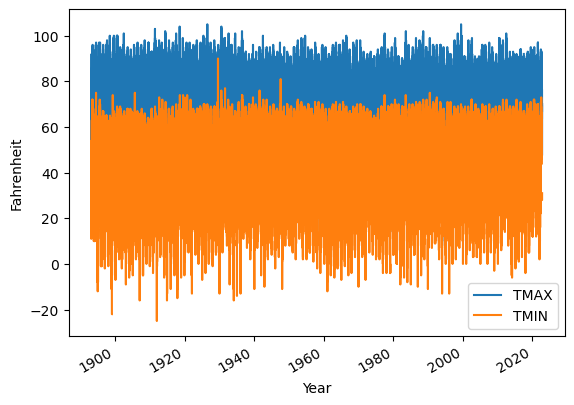

In [9]:
df[['DateObject','TMAX','TMIN']].plot(x='DateObject', ylabel = 'Fahrenheit', xlabel='Year')


In [42]:
df_max= df.pivot(index='Year', columns=['Month', 'Day'], values='TMAX')
df_min= df.pivot(index='Year', columns=['Month', 'Day'], values='TMIN')

In [44]:
df_max.columns

MultiIndex([(2, 28),
            (3,  1),
            (3,  2),
            (3,  3),
            (3,  4),
            (3,  5),
            (3,  6),
            (3,  7),
            (3,  8),
            (3,  9),
            ...
            (2, 18),
            (2, 19),
            (2, 20),
            (2, 21),
            (2, 22),
            (2, 23),
            (2, 24),
            (2, 25),
            (2, 26),
            (2, 27)],
           names=['Month', 'Day'], length=365)

In [45]:
df_max=df_max.T
df_min=df_min.T

In [46]:
df_max

Year       1893  1894  1895  1896  1897  1898  1899  1900  1901  1902  ...  \
Month Day                                                              ...   
2     28   50.0  50.0  57.0  55.0  38.0  38.0  51.0  30.0  48.0  65.0  ...   
3     1    52.0  53.0  68.0  52.0  45.0  45.0  58.0  52.0  50.0  63.0  ...   
      2    58.0  54.0  38.0  39.0  64.0  42.0  65.0  48.0  60.0  53.0  ...   
      3    52.0  57.0  50.0  44.0  67.0  38.0  53.0  46.0  60.0  42.0  ...   
      4    59.0  60.0  52.0  45.0  53.0  38.0  67.0  52.0  58.0  32.0  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2     23    NaN  37.0  36.0  61.0  49.0  39.0  46.0  53.0  29.0  43.0  ...   
      24    NaN  20.0  40.0  62.0  42.0  50.0  41.0  48.0  35.0  48.0  ...   
      25    NaN  28.0  55.0  35.0  46.0  42.0  42.0  26.0  45.0  43.0  ...   
      26    NaN  40.0  50.0  55.0  35.0  38.0  38.0  26.0  48.0  55.0  ...   
      27    NaN  46.0  55.0  58.0  30.0  30.0  50.0  33.0  40.0  52.0  ...   

Year       2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
Month Day                                                              
2     28   51.0  40.0  32.0  48.0  50.0  56.0  53.0  37.0  59.0  54.0  
3     1    42.0  32.0  29.0  60.0  59.0  60.0  52.0  38.0  55.0  50.0  
      2    38.0  50.0  35.0  65.0  69.0  53.0  36.0  54.0  54.0   NaN  
      3    40.0  60.0  47.0  54.0  56.0  45.0  37.0  61.0  45.0  67.0  
      4    40.0  35.0  39.0  40.0  38.0  50.0  34.0  65.0  58.0  62.0  
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2     23   33.0  61.0  33.0  47.0  61.0  60.0  47.0  52.0  49.0  59.0  
      24   50.0  66.0  35.0  41.0  74.0  59.0  42.0  59.0  55.0  72.0  
      25   51.0  45.0  26.0  45.0  74.0  59.0  61.0  55.0  64.0  46.0  
      26   42.0  41.0  37.0  51.0  63.0  60.0  48.0  64.0  55.0   NaN  
      27   37.0  36.0  32.0  37.0  50.0  50.0  58.0  52.0  47.0  44.0  

[365 rows x 130 columns]

In [47]:
df_max=df_max.sort_values(['Month', 'Day'])
df_min=df_min.sort_values(['Month', 'Day'])

In [51]:
df_max.to_csv('./DaleEnterprise_TMAX_20221023_ByDay.csv')
df_min.to_csv('./DaleEnterprise_TMIN_20221023_ByDay.csv')

<AxesSubplot:xlabel='Year', ylabel='Temperature (F)'>

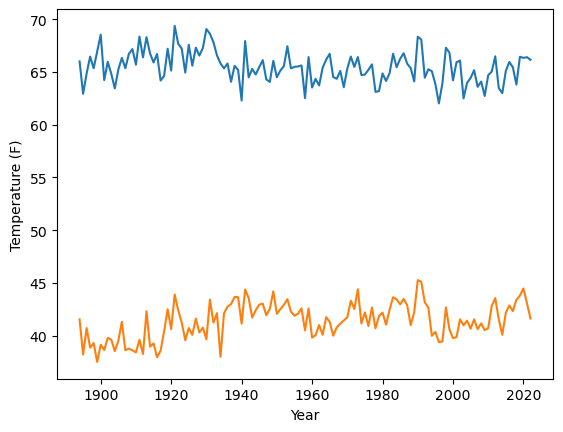

In [58]:
df_max.mean().iloc[1::].plot()
df_min.mean().iloc[1::].plot(ylabel = 'Temperature (F)')


<AxesSubplot:xlabel='Month,Day'>

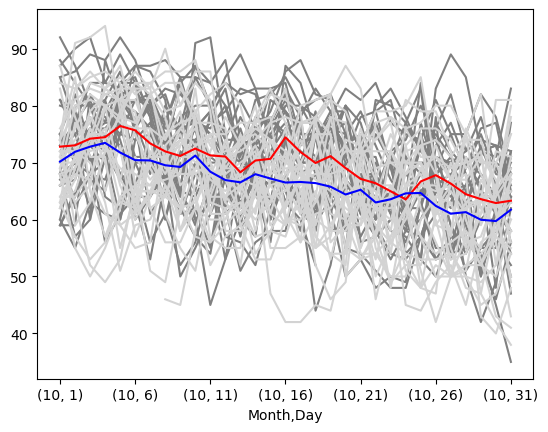

In [96]:
ax1 = df_max.loc[[(10)]][range(1900,1930)].plot(color='grey',legend=None)
df_max.loc[[(10)]][range(1990,2020)].plot(color='lightgrey',legend=None, ax = ax1)
df_max.loc[[(10)]][range(1900,1930)].mean(axis=1).plot(color='r', ax = ax1)
df_max.loc[[(10)]][range(1990,2020)].mean(axis=1).plot(color='b', ax = ax1)


<AxesSubplot:xlabel='Month,Day'>

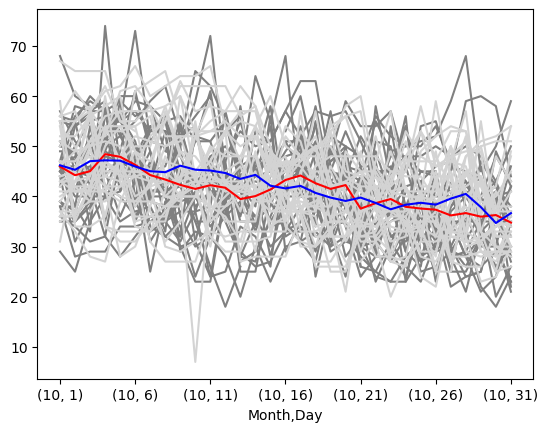

In [97]:
ax1 = df_min.loc[[(10)]][range(1900,1930)].plot(color='grey',legend=None)
df_min.loc[[(10)]][range(1990,2020)].plot(color='lightgrey',legend=None, ax = ax1)
df_min.loc[[(10)]][range(1900,1930)].mean(axis=1).plot(color='r', ax = ax1)
df_min.loc[[(10)]][range(1990,2020)].mean(axis=1).plot(color='b', ax = ax1)